In [6]:
import pandas as pd
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("rashikrahmanpritom/heart-attack-analysis-prediction-dataset")

# Assuming the dataset file is a CSV file
csv_file_path = f"{path}/heart.csv"  # Adjust the file name as needed

# Load the dataset into a DataFrame
df = pd.read_csv(csv_file_path)

# Preview the first few rows of the DataFrame
print(df.head())



   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [7]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [8]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target variable (assuming 'output' is the target, replace if different)
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Building the model
model = Sequential()

# Input layer and first hidden layer (number of neurons = 32, activation = ReLU)
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(16, activation='relu'))

# Dropout layer to avoid overfitting
model.add(Dropout(0.5))

# Output layer (1 neuron, sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=64, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0174 - val_accuracy: 0.8361 - val_loss: 2.1214
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0200 - val_accuracy: 0.8361 - val_loss: 2.1262
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9899 - loss: 0.0324 - val_accuracy: 0.8197 - val_loss: 2.1303
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9957 - loss: 0.0277 - val_accuracy: 0.8197 - val_loss: 2.1364
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0228 - val_accuracy: 0.8361 - val_loss: 2.1437
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9957 - loss: 0.0390 - val_accuracy: 0.8361 - val_loss: 2.1449
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9983 - loss: 0.0239 - val_accuracy: 0.8361 - val_loss: 2.1471
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0289 - val_accuracy: 0.8361 - val_loss: 2.149

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train with early stopping
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=128, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping], verbose=1)


Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.0179 - val_accuracy: 0.8525 - val_loss: 2.9534
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9919 - loss: 0.0298 - val_accuracy: 0.8525 - val_loss: 2.9527
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 0.8525 - val_loss: 2.9530
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9972 - loss: 0.0159 - val_accuracy: 0.8525 - val_loss: 2.9547
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 0.8361 - val_loss: 2.9541
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 0.8361 - val_loss: 2.9546
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.8361 - val_loss: 2.9553
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.0167 - val_accuracy: 0.8361 - val_loss:

In [44]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8525


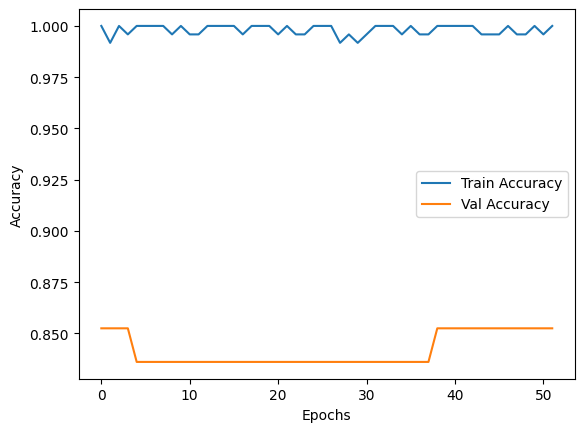

In [43]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
